In [1]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into DataFrame

df = pd.read_csv("../data/raw/diabetes_prediction_dataset.csv")

In [3]:
# Display top rows of dataset

print("Top rows of dataset:")
print(df.head())

Top rows of dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [4]:
# Display dataset dimensions

print("Dataset dimensions:")
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Dataset dimensions:
Number of rows: 100000
Number of columns: 9


In [5]:
# Display dataset columns

print("Dataset columns:")
print(df.columns)

Dataset columns:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [6]:
# Display dataset data types

print("Dataset data types:")
print(df.dtypes)

Dataset data types:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [7]:
# Display dataset summary

print("Dataset summary:")
df.info()

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
# Display dataset statistical summary

print("Dataset statistical summary:")
print(df.describe())

Dataset statistical summary:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50% 

In [9]:
# Display unique values and value counts for each column

print("Unique values and value counts per column:")
print("\n")
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print(f"\nUnique value counts in {column}:")
    print(df[column].value_counts())
    print("\n")

Unique values and value counts per column:


Unique values in gender:
['Female' 'Male' 'Other']

Unique value counts in gender:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


Unique values in age:
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]

Unique value counts in age:
age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40      

In [10]:
# Check for null values

print("Dataset null values:")
df.isnull().sum()

Dataset null values:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
# Drop records with null values

df = df.dropna()

In [12]:
# Check for duplicate records

print("Dataset duplicate records:")
df.duplicated().sum()

Dataset duplicate records:


3854

In [13]:
# Drop duplicate records

df = df.drop_duplicates()

In [14]:
# Drop records where gender is "Other"

df = df[df["gender"] != "Other"]

In [15]:
# Define numerical columns, categorical columns and target

numerical_columns = ['age' ,'bmi' ,'HbA1c_level' ,'blood_glucose_level']

categorical_columns = ['gender' ,'hypertension' ,'heart_disease' ,'smoking_history']

target = 'diabetes'

In [16]:
print("Class distribution of diabetes:")
print(df[target].value_counts())
print("\nDistribution by percentage:")
print(df[target].value_counts(normalize=True) * 100)

Class distribution of diabetes:
diabetes
0    87646
1     8482
Name: count, dtype: int64

Distribution by percentage:
diabetes
0    91.176348
1     8.823652
Name: proportion, dtype: float64


In [17]:
for column in numerical_columns:
    print(f"\nStatistical summary for {column} grouped by {target}:")
    print(df.groupby(target)[column].describe())


Statistical summary for age grouped by diabetes:
            count       mean        std   min   25%   50%   75%   max
diabetes                                                             
0         87646.0  39.945362  22.228848  0.08  22.0  40.0  57.0  80.0
1          8482.0  60.925961  14.545301  3.00  52.0  62.0  72.0  80.0

Statistical summary for bmi grouped by diabetes:
            count       mean       std    min    25%     50%    75%    max
diabetes                                                                  
0         87646.0  26.868898  6.509934  10.01  23.00  27.320  29.17  95.69
1          8482.0  31.997755  7.563494  10.98  27.32  29.985  35.94  88.72

Statistical summary for HbA1c_level grouped by diabetes:
            count      mean       std  min  25%  50%  75%  max
diabetes                                                      
0         87646.0  5.396934  0.970804  3.5  4.8  5.8  6.2  6.6
1          8482.0  6.934827  1.076462  5.7  6.1  6.6  7.5  9.0

Statistic

In [18]:
for column in categorical_columns:
    print(f"Class distribution for {column} by {target}:")
    print(pd.crosstab(df[column], df[target]))
    print("\nDistribution by percentage:")
    print(pd.crosstab(df[column], df[target], normalize='index') * 100)
    print("\n")

Class distribution for gender by diabetes:
diabetes      0     1
gender               
Female    51714  4447
Male      35932  4035

Distribution by percentage:
diabetes          0          1
gender                        
Female    92.081694   7.918306
Male      89.904171  10.095829


Class distribution for hypertension by diabetes:
diabetes          0     1
hypertension             
0             82271  6396
1              5375  2086

Distribution by percentage:
diabetes              0          1
hypertension                      
0             92.786493   7.213507
1             72.041281  27.958719


Class distribution for heart_disease by diabetes:
diabetes           0     1
heart_disease             
0              84990  7215
1               2656  1267

Distribution by percentage:
diabetes               0          1
heart_disease                      
0              92.175045   7.824955
1              67.703288  32.296712


Class distribution for smoking_history by diabetes:
diabe

In [19]:
print("Correlation of numerical features with diabetes:\n")
print(df[numerical_columns + [target]].corr()[target].sort_values(ascending=False))

Correlation of numerical features with diabetes:

diabetes               1.000000
blood_glucose_level    0.424366
HbA1c_level            0.406446
age                    0.264918
bmi                    0.214951
Name: diabetes, dtype: float64


In [20]:
# Display correlation matrix for numerical features

print("Correlation matrix of numerical features:")
print(df[numerical_columns].corr())

Correlation matrix of numerical features:
                          age       bmi  HbA1c_level  blood_glucose_level
age                  1.000000  0.344779     0.106708             0.114323
bmi                  0.344779  1.000000     0.084443             0.092593
HbA1c_level          0.106708  0.084443     1.000000             0.171717
blood_glucose_level  0.114323  0.092593     0.171717             1.000000


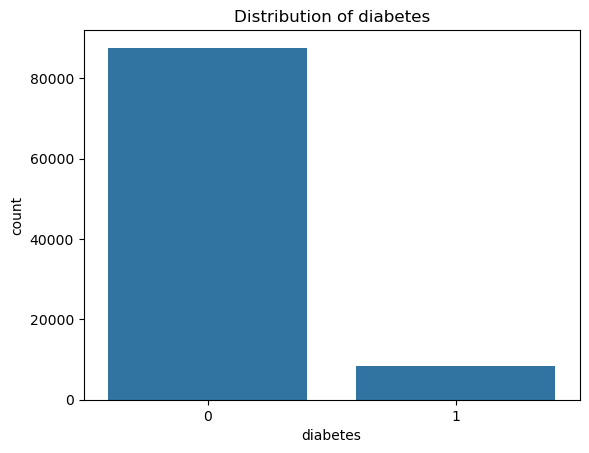

In [21]:
# Count plot for target

sns.countplot(data=df, x=target)
plt.title(f"Distribution of {target}")
plt.show()

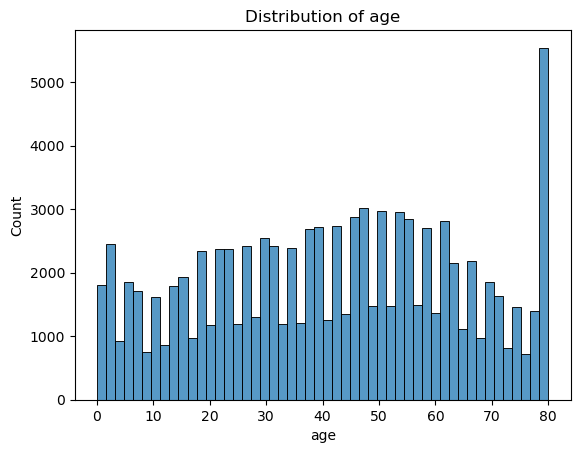

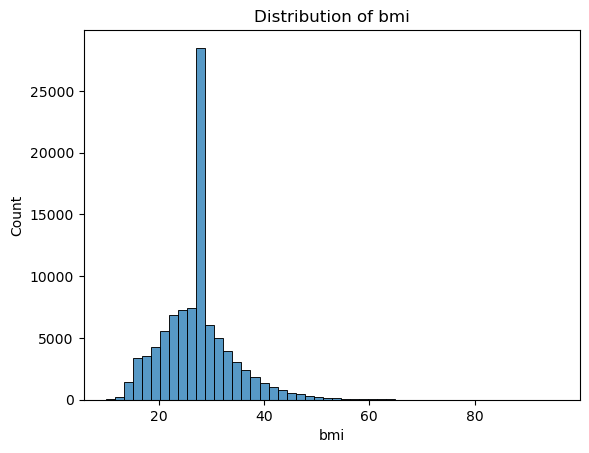

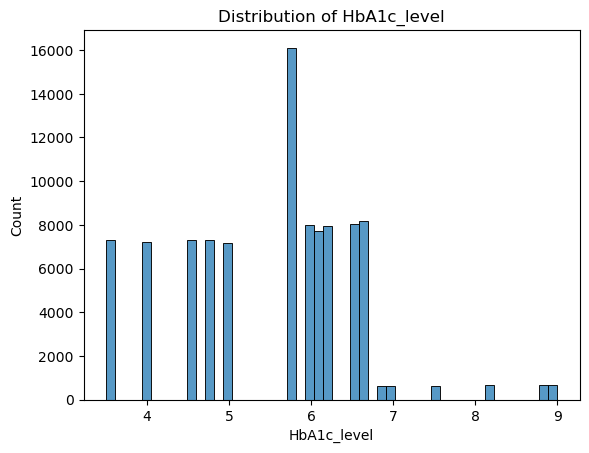

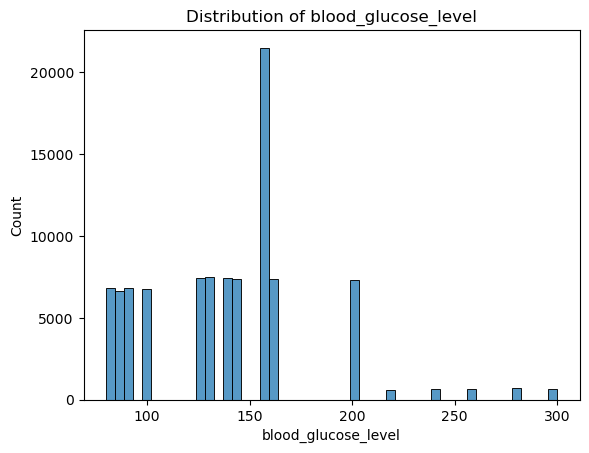

In [66]:
# Kde plot for numerical columns

for column in numerical_columns:
    sns.histplot(data=df, x=column, bins=50)
    plt.title(f"Distribution of {column}")
    plt.show()

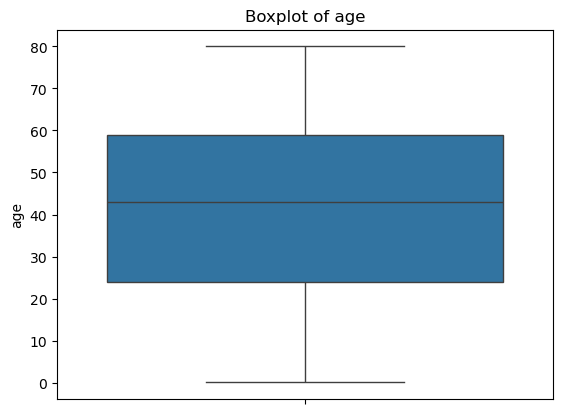

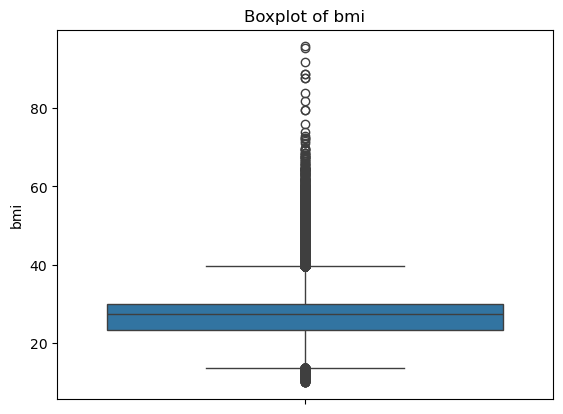

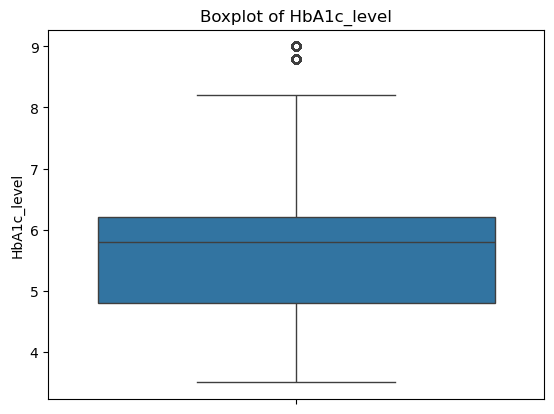

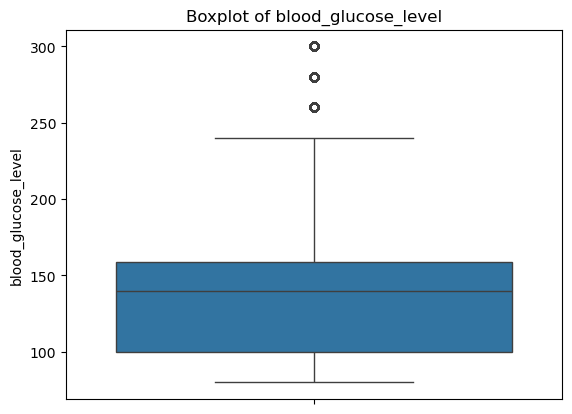

In [23]:
# Box plot for numerical columns
for column in numerical_columns:
    sns.boxplot(data=df, y=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

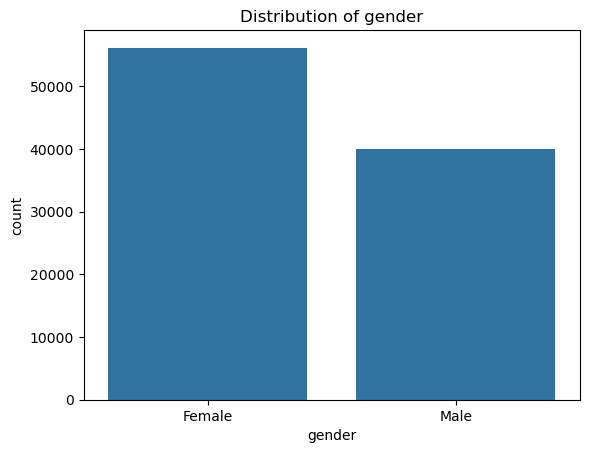

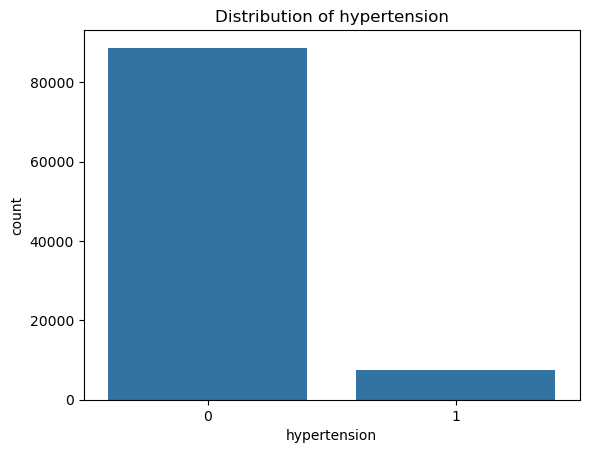

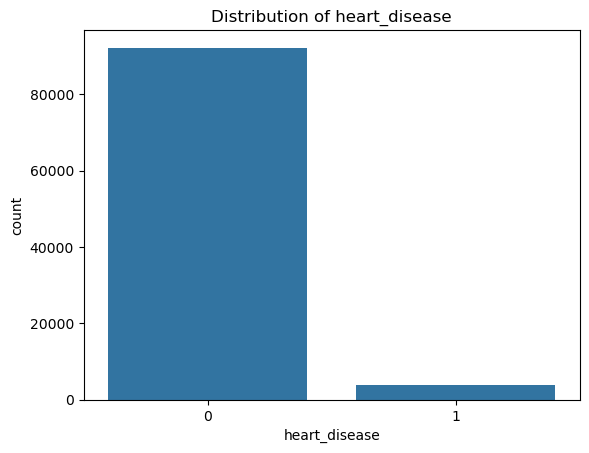

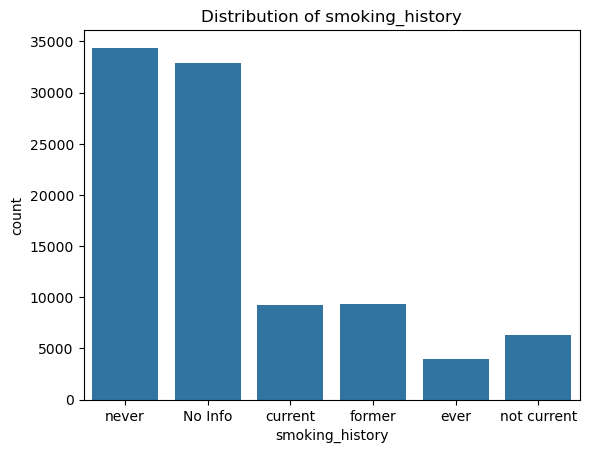

In [24]:
# Count plot for categorical columns

for column in categorical_columns:
    sns.countplot(data=df,x=column)
    plt.title(f"Distribution of {column}")
    plt.show()

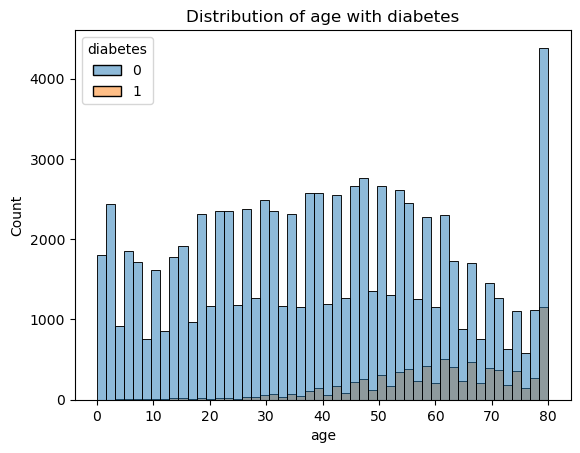

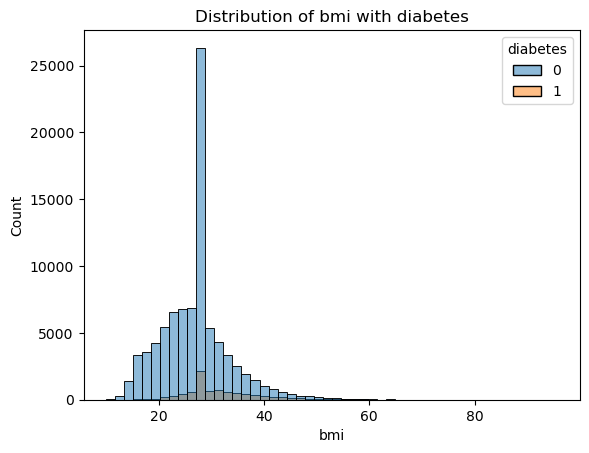

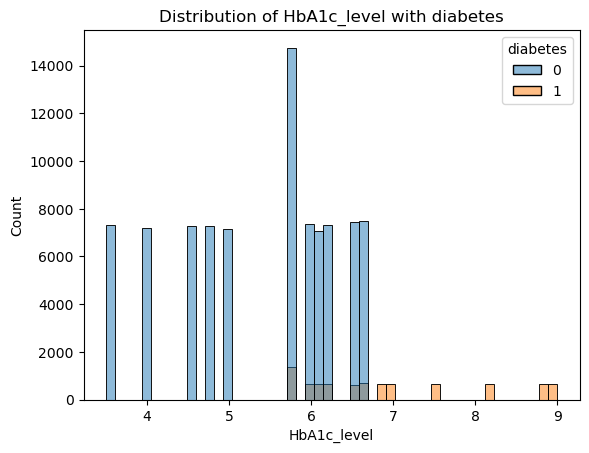

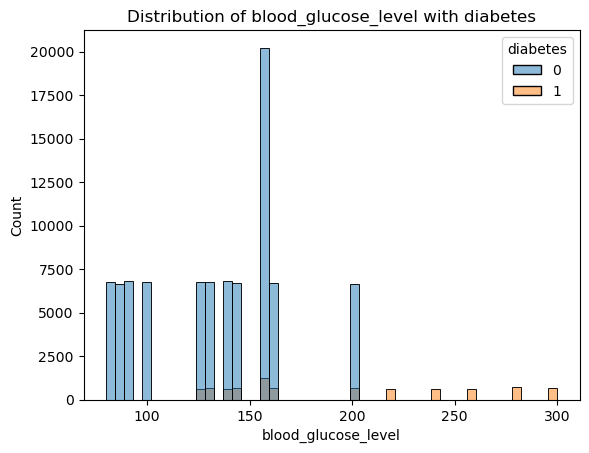

In [64]:
# Kde plot for numerical columns with target

for column in numerical_columns:
    sns.histplot(data=df, x=column, hue=target, bins=50)
    plt.title(f"Distribution of {column} with {target}")
    plt.show()

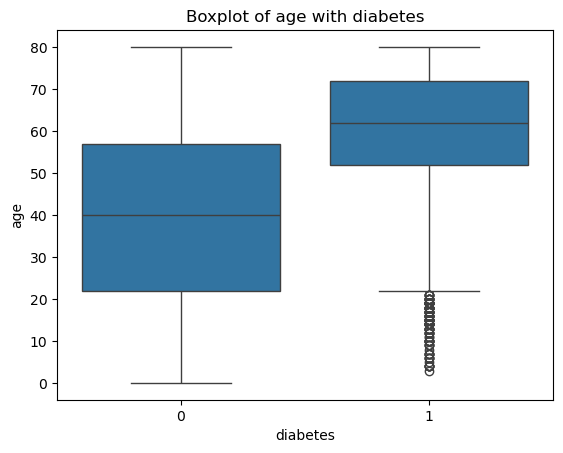

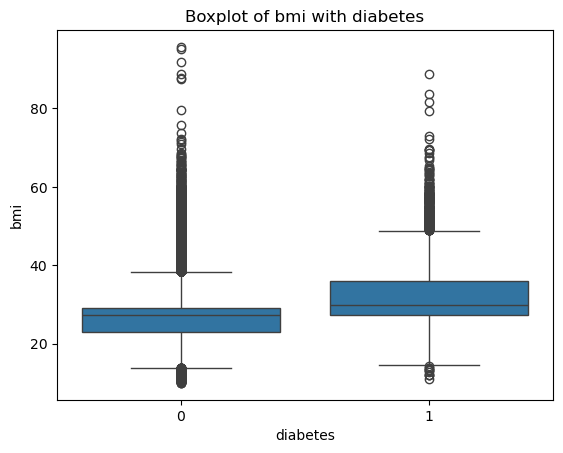

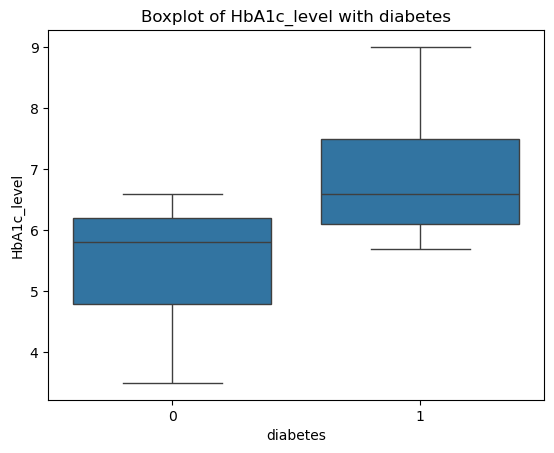

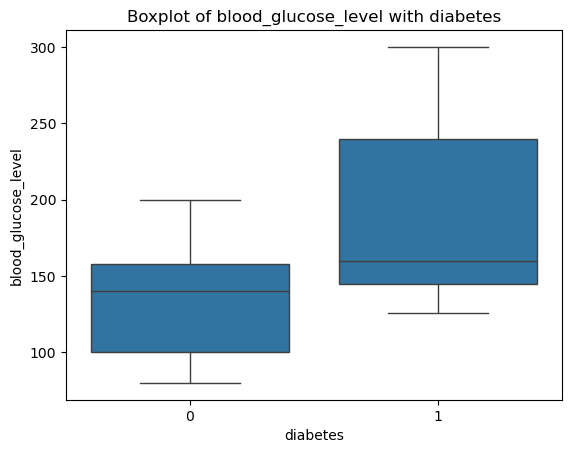

In [26]:
# Box plot for numerical columns with target

for column in numerical_columns:
    sns.boxplot(data=df, x=target, y=column)
    plt.title(f"Boxplot of {column} with {target}")
    plt.show()

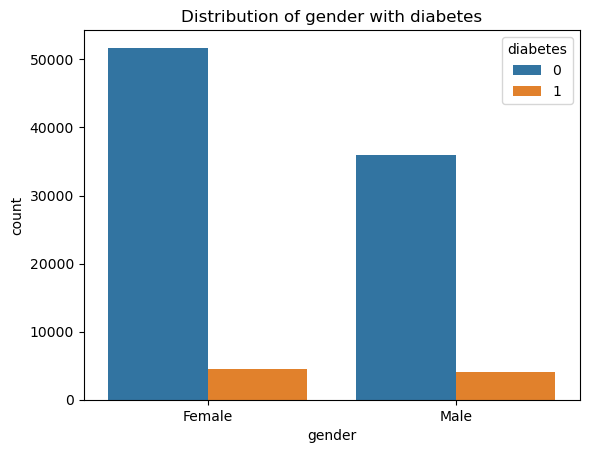

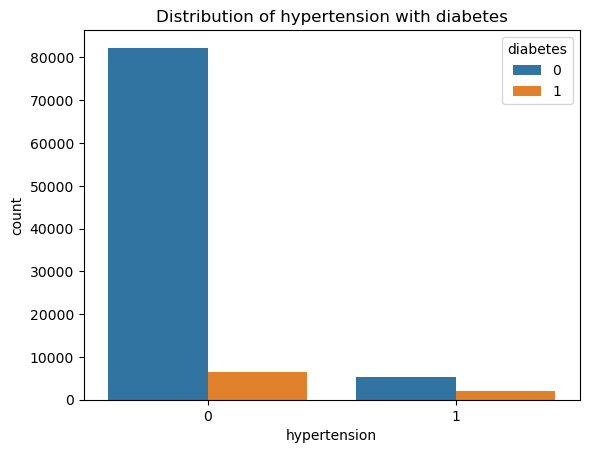

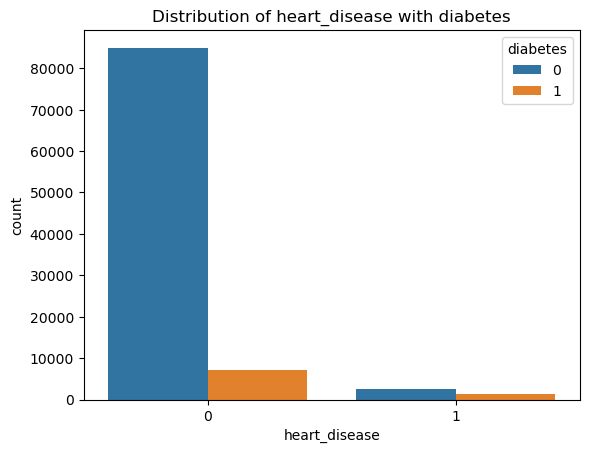

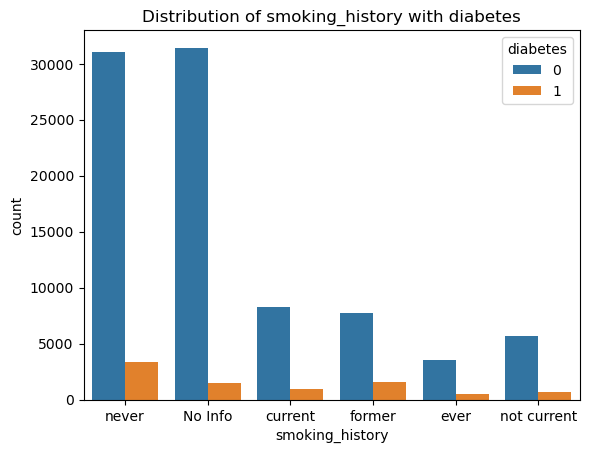

In [27]:
# Count plot for categorical columns with target

for column in categorical_columns:
    sns.countplot(data=df, x=column, hue=target)
    plt.title(f"Distribution of {column} with {target}")
    plt.show()

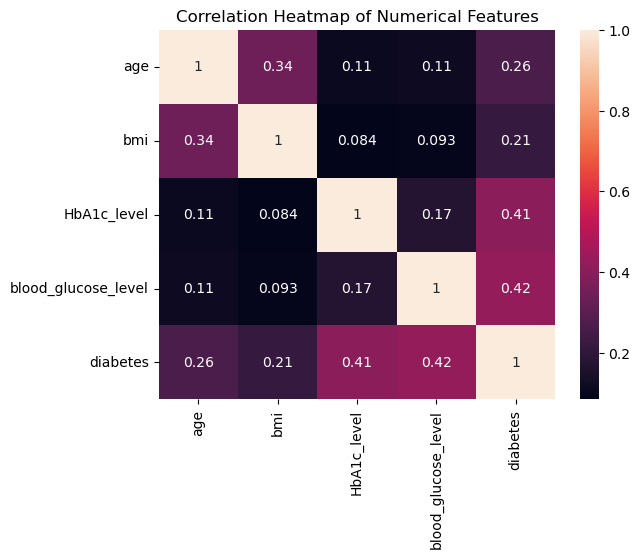

In [28]:
sns.heatmap(df[numerical_columns + [target]].corr(), annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

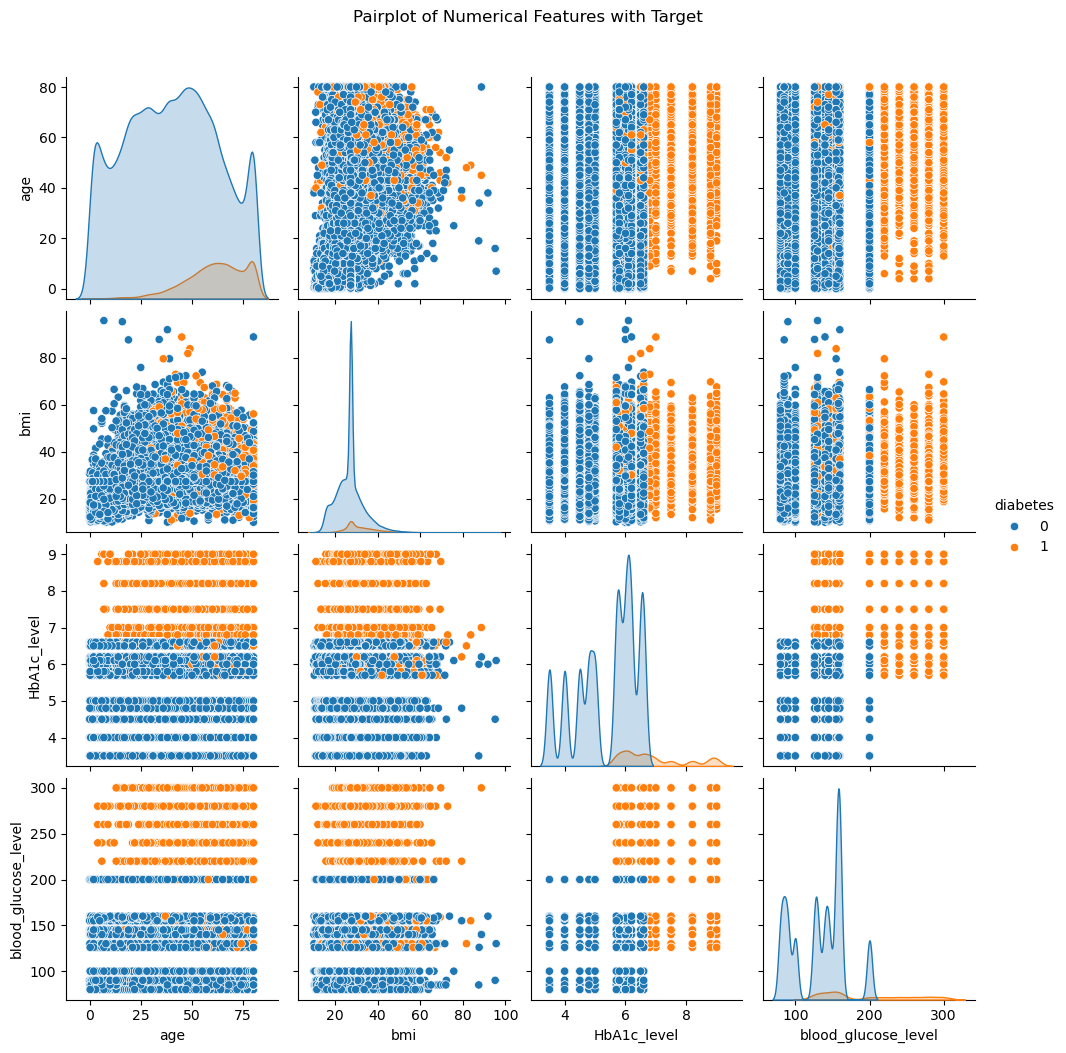

In [68]:
# Pairplot for numerical columns with target

sns.pairplot(df, vars=numerical_columns, hue=target)
plt.suptitle("Pairplot of Numerical Features with Target", y=1.05)
plt.show()